## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

Accuracy = 1.000


In [3]:
def get_best_model_and_accuracy(model, params, X, y):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model, params, cv=5, error_score=0, n_jobs=-1,iid=False)
    grid.fit(X, y)
    print(f"Best accuracy: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    print(f"Average time to fit (s): {grid.cv_results_['mean_fit_time'].mean():.3f}")
    print(f"Average time to score (s): {grid.cv_results_['mean_score_time'].mean():.3f}")

In [4]:
from sklearn.pipeline import Pipeline

clf = RandomForestClassifier(n_estimators=10)

pipeline = Pipeline([('clf', clf)])
params = {
    'clf__n_estimators': [10, 20, 50, 100],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [2, 5, 10],
}
get_best_model_and_accuracy(pipeline, params, X, y)

Best accuracy: 0.9836336336336335
Best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Average time to fit (s): 0.059
Average time to score (s): 0.006


In [5]:
for depth in [1, 2, 5, 10]:
    rf = RandomForestClassifier(n_estimators=50, criterion='gini', min_samples_leaf=5, min_samples_split=10,max_depth=depth)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(f"max_depth={depth}, Accuracy = {accuracy_score(y_test, y_pred):.3f}")

max_depth=1, Accuracy = 0.978
max_depth=2, Accuracy = 1.000
max_depth=5, Accuracy = 1.000
max_depth=10, Accuracy = 0.978


In [6]:
rf = RandomForestClassifier(n_estimators=50, criterion='gini', min_samples_leaf=5, min_samples_split=10,
                               max_depth=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

Accuracy = 1.000


In [7]:
rf.feature_importances_

array([0.11852765, 0.006865  , 0.        , 0.00661621, 0.05435231,
       0.08394283, 0.1687535 , 0.00846962, 0.01538953, 0.17050033,
       0.10576916, 0.11370149, 0.14711236])

                        Variable  Feature Importance
0                color_intensity            0.170500
1                     flavanoids            0.168754
2                        proline            0.147112
3                        alcohol            0.118528
4   od280/od315_of_diluted_wines            0.113701
5                            hue            0.105769
6                  total_phenols            0.083943
7                      magnesium            0.054352
8                proanthocyanins            0.015390
9           nonflavanoid_phenols            0.008470
10                    malic_acid            0.006865
11             alcalinity_of_ash            0.006616
12                           ash            0.000000


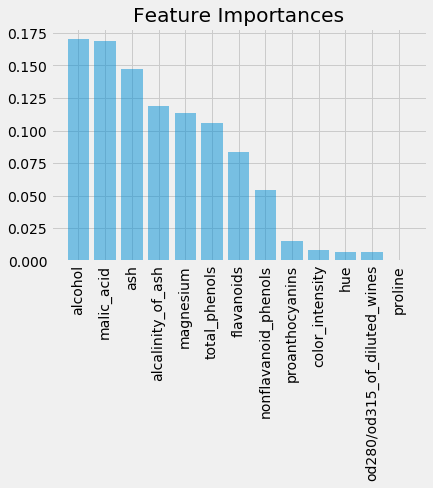

In [8]:
importances = rf.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
feature_importances=[]
for f in range(X_train.shape[1]):
    feature_importances.append([wine.feature_names[indices[f]],importances[indices[f]]])
    
print(pd.DataFrame(feature_importances,columns=['Variable','Feature Importance']))
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],align='center',alpha=0.5)
plt.xticks(range(X_train.shape[1]),[wine.feature_names[f] for f in range(X_train.shape[1])], rotation=90)
plt.show()